# EDA for Washington, D.C., District of Columbia, United States

The goal is to examine various factors such as price, availability, location, and property type to uncover the underlying trends and patterns that influence the demand for Airbnb listings. 

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
airbnb_df = pd.read_csv("E:\Electro pi\Washington.csv")

In [3]:
airbnb_df.info() # dataset contains 18 columns and 6853 rows, notes that the neighbourhood_group is empty

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6853 entries, 0 to 6852
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6853 non-null   int64  
 1   name                            6853 non-null   object 
 2   host_id                         6853 non-null   int64  
 3   host_name                       6853 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   6853 non-null   object 
 6   latitude                        6853 non-null   float64
 7   longitude                       6853 non-null   float64
 8   room_type                       6853 non-null   object 
 9   price                           5995 non-null   float64
 10  minimum_nights                  6853 non-null   int64  
 11  number_of_reviews               6853 non-null   int64  
 12  last_review                     53

In [4]:
airbnb_df.head() #seeing how the data is being represented in the dataframe.

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3686,Home in Washington · ★4.64 · 1 bedroom · 1 bed...,4645,Vita,NaN,Historic Anacostia,38.86339,-76.98889,Private room,67.0,31,84,8/30/2023,0.53,1,365,3,NaN
1,3943,Townhouse in Washington · ★4.83 · 1 bedroom · ...,5059,Vasa,NaN,"Edgewood, Bloomingdale, Truxton Circle, Eckington",38.91195,-77.00456,Private room,66.0,1,495,11/22/2023,2.78,5,252,46,Hosted License: 5007242201001033
2,4197,Home in Washington · ★4.85 · 1 bedroom · 1 bed...,5061,Sandra,NaN,"Capitol Hill, Lincoln Park",38.88719,-76.99472,Private room,135.0,7,58,11/11/2023,0.33,2,321,6,Hosted License: 5007242201000749
3,4529,Home in Washington · ★4.66 · 1 bedroom · 1 bed...,5803,Bertina,NaN,"Eastland Gardens, Kenilworth",38.90585,-76.94469,Private room,56.0,30,102,7/5/2019,0.58,2,179,0,Exempt
4,4967,Home in Washington · ★4.74 · 1 bedroom · 1 bed...,7086,Edward,NaN,"Ivy City, Arboretum, Trinidad, Carver Langston",38.91217,-76.99249,Private room,2500.0,1125,30,9/22/2016,0.19,3,365,0,NaN


There's a large range in price ( minimum of $10 and a maximum of $10,000 ). This suggests a diverse range of listings in terms of price and potentially property types.

The standard deviation for price is also high ($557.9), which further indicates a spread of prices across listings.

The minimum night stay varies considerably, with some listings having a 1-night minimum and others requiring a stay of up to 1125 nights. This suggests that there are short-term rentals as well as long-term rentals suitable for extended stays.


In [5]:
airbnb_df.describe() # summary statistic of each column


,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,6.853000e+03,6.853000e+03,0.0,6853.000000,6853.000000,5995.000000,6853.000000,6853.000000,5365.000000,6853.000000,6853.000000,6853.000000
mean,3.176959e+17,1.316931e+08,NaN,38.910193,-77.013581,194.011676,18.826208,55.743178,1.852078,26.533927,170.040712,13.537867
std,4.164083e+17,1.561191e+08,NaN,0.024760,0.030734,557.907916,39.064745,94.543588,1.960745,60.489484,142.538398,21.431373
min,3.686000e+03,4.492000e+03,NaN,38.819950,-77.112690,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.284937e+07,1.720706e+07,NaN,38.897418,-77.032860,86.000000,2.000000,1.000000,0.340000,1.000000,0.000000,0.000000
50%,4.750696e+07,5.593934e+07,NaN,38.909700,-77.014860,120.000000,3.000000,15.000000,1.240000,2.000000,169.000000,2.000000
75%,7.854032e+17,1.932459e+08,NaN,38.923230,-76.994200,177.000000,31.000000,69.000000,2.810000,13.000000,324.000000,20.000000
max,1.047931e+18,5.510398e+08,NaN,38.992140,-76.910920,10000.000000,1125.000000,954.000000,28.480000,234.000000,365.000000,285.000000


What is the  most frequently rented type?

In [6]:
 airbnb_df['room_type'].mode()


0    Entire home/apt
Name: room_type, dtype: object

In [7]:
value_counts = airbnb_df['room_type'].value_counts()# Counting the occurrences of each property type
value_counts

Entire home/apt    5201
Private room       1559
Shared room          83
Hotel room           10
Name: room_type, dtype: int64

Identifying the neighborhood with the highest concentration of Airbnb listings

In [8]:
airbnb_df['neighbourhood'].mode()


0    Union Station, Stanton Park, Kingman Park
Name: neighbourhood, dtype: object

Which neighborhoods have the most Airbnb listings?
Are there any neighborhoods that are much more popular than others for Airbnb listings?

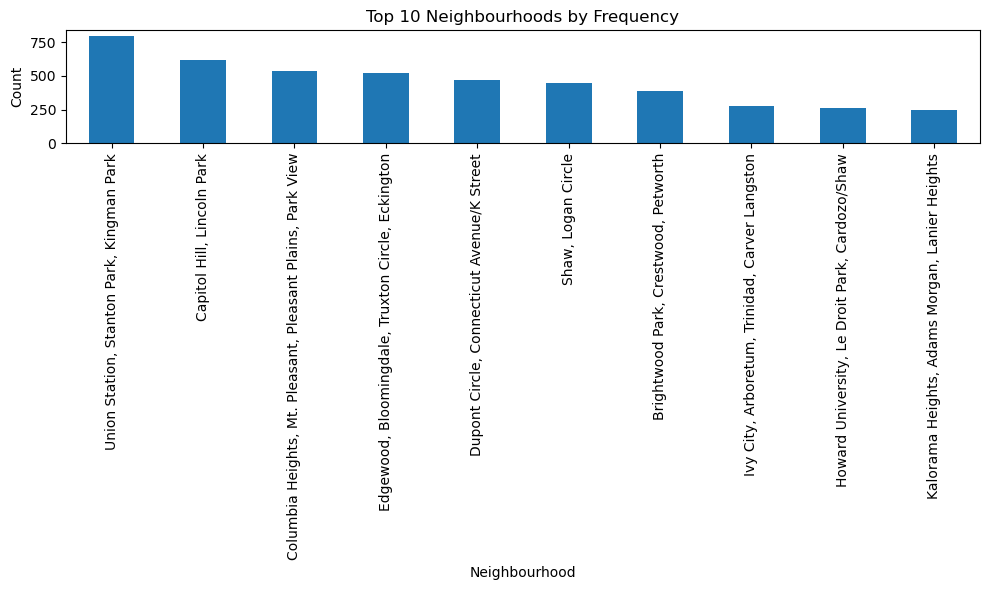

In [9]:
value_counts = airbnb_df['neighbourhood'].value_counts()
# Select only the top 10 most frequent values
top_10 = value_counts.head(10)

# Plotting
plt.figure(figsize=(10, 6))
top_10.plot(kind='bar')
plt.title('Top 10 Neighbourhoods by Frequency')
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.xticks(rotation=90) 
plt.tight_layout() 
plt.show()

In [10]:
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

Which features in the Airbnb listings data have the highest proportion of missing values?

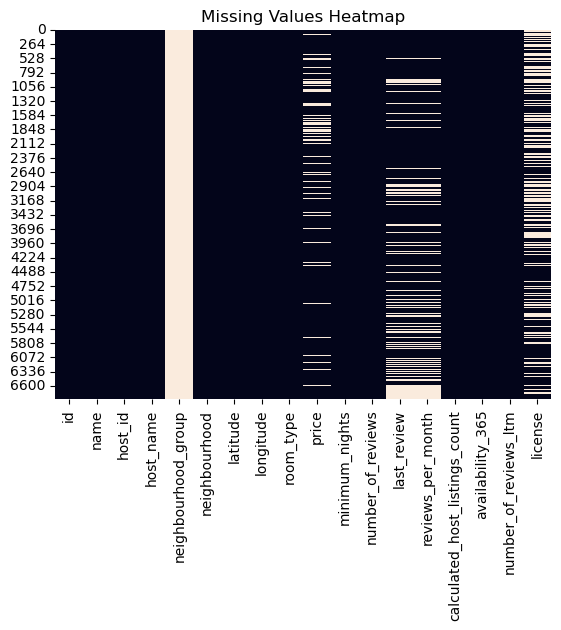

In [11]:
#Some columns in the figure below indicate the presence of missing values.
sns.heatmap(airbnb_df.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()


In [12]:
#Counting NAs to assess data quality
na_per_column = pd.DataFrame(airbnb_df.isna().sum(), columns=['NA_Count']) # here a table showing the number of NA 
na_per_column

,NA_Count
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,6853
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,858


In [13]:
#Since price is a crucial feature in the analysis, 
#it will be retained, while other columns with a substantial number of NA values will be dropped.
na_counts = airbnb_df.isna().sum()
columns_to_drop = na_counts[na_counts > 858].index
airbnb_df = airbnb_df.drop(columns=columns_to_drop)

In [14]:
#Examining NA counts after data cleaning
na_per_column = pd.DataFrame(airbnb_df.isna().sum(), columns=['NA_Count'])
na_per_column

,NA_Count
id,0
name,0
host_id,0
host_name,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,858
minimum_nights,0


# Handling NA

In [15]:
# Imputing missing prices using type-based means:
#This code addresses missing values (NA) in the 'price' column by imputing them with the mean price of each listing type.
mean_prices = airbnb_df.groupby("room_type")["price"].mean()
for i, row in airbnb_df.iterrows():
    if pd.isna(row["price"]):
        room_type = row["room_type"]
        if room_type in mean_prices.index:
            airbnb_df.at[i, "price"] = mean_prices[room_type]


In [16]:
#The objective is to analyze various factors including price, availability, and location.
#Consequently, we can discard columns that are irrelevant to this analysis.

columns_to_drop = ['id','name', 'number_of_reviews','number_of_reviews_ltm', 'latitude', 'longitude']  
airbnb_df = airbnb_df.drop(columns=columns_to_drop)
airbnb_df

,host_id,host_name,neighbourhood,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,4645,Vita,Historic Anacostia,Private room,67.0,31,1,365
1,5059,Vasa,"Edgewood, Bloomingdale, Truxton Circle, Eckington",Private room,66.0,1,5,252
2,5061,Sandra,"Capitol Hill, Lincoln Park",Private room,135.0,7,2,321
3,5803,Bertina,"Eastland Gardens, Kenilworth",Private room,56.0,30,2,179
4,7086,Edward,"Ivy City, Arboretum, Trinidad, Carver Langston",Private room,2500.0,1125,3,365
...,...,...,...,...,...,...,...,...
6848,107434423,Blueground,"Shaw, Logan Circle",Entire home/apt,173.0,32,234,105
6849,437660791,Eddie-HostelChic,"Brightwood Park, Crestwood, Petworth",Private room,79.0,1,28,267
6850,437660791,Eddie-HostelChic,"Brightwood Park, Crestwood, Petworth",Entire home/apt,87.0,1,28,270
6851,437660791,Eddie-HostelChic,"Brightwood Park, Crestwood, Petworth",Entire home/apt,79.0,1,28,270


<Axes: ylabel='price'>

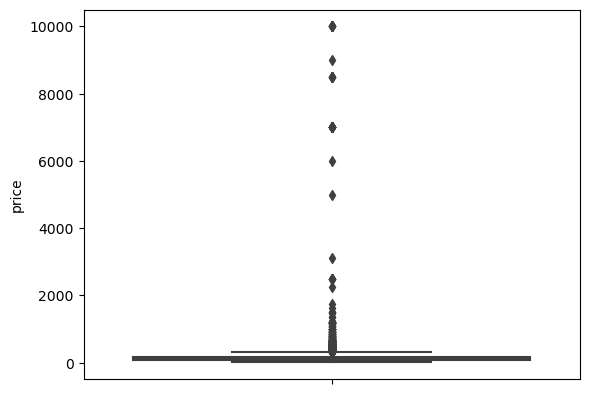

In [17]:
# the plot shows the presence of outlier.
sns.boxplot( y = 'price',  data = airbnb_df) 


In [18]:
# This code employs statistical techniques to detect outliers in the 'price' column.
def remove_outliers(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    fence_low = q1 - 1.5 * iqr
    fence_high = q3 + 1.5 * iqr
    df_clean = df.loc[(df[col_name] > fence_low) & (df[col_name] < fence_high)]
    return df_clean


airbnb_df= remove_outliers(airbnb_df, 'price')


<Axes: ylabel='price'>

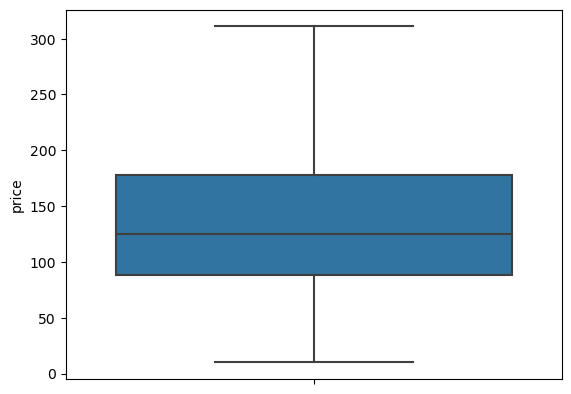

In [19]:
#The plot after removing the outliers
sns.boxplot( y = 'price',  data = airbnb_df) 

Airbnb pricing data reveals the following average prices by room type


In [20]:
mean_prices = airbnb_df.groupby("room_type")["price"].mean()
pd.DataFrame(mean_prices)

,price
room_type,
Entire home/apt,143.795469
Hotel room,46.300000
Private room,105.386361
Shared room,53.555556


Information about the pricing patterns for different room types on Airbnb.

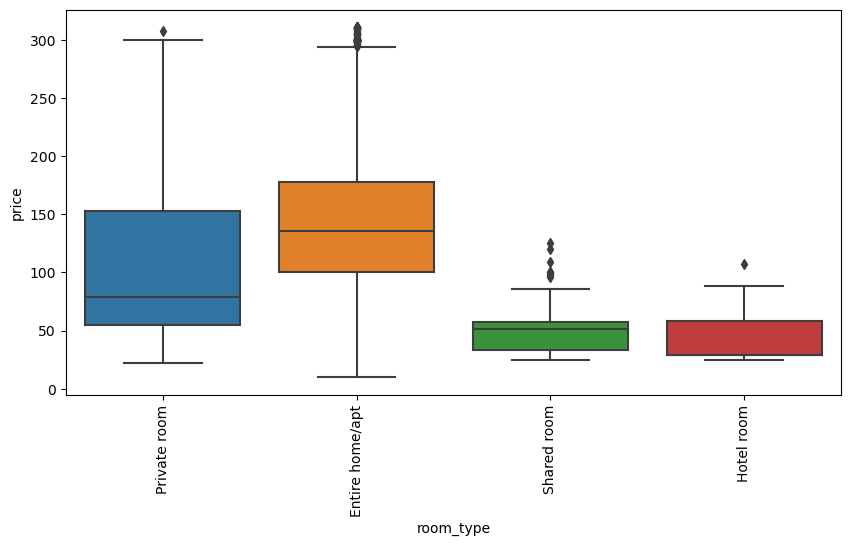

In [21]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'room_type', y = 'price',  data = airbnb_df)
xt = plt.xticks(rotation=90)

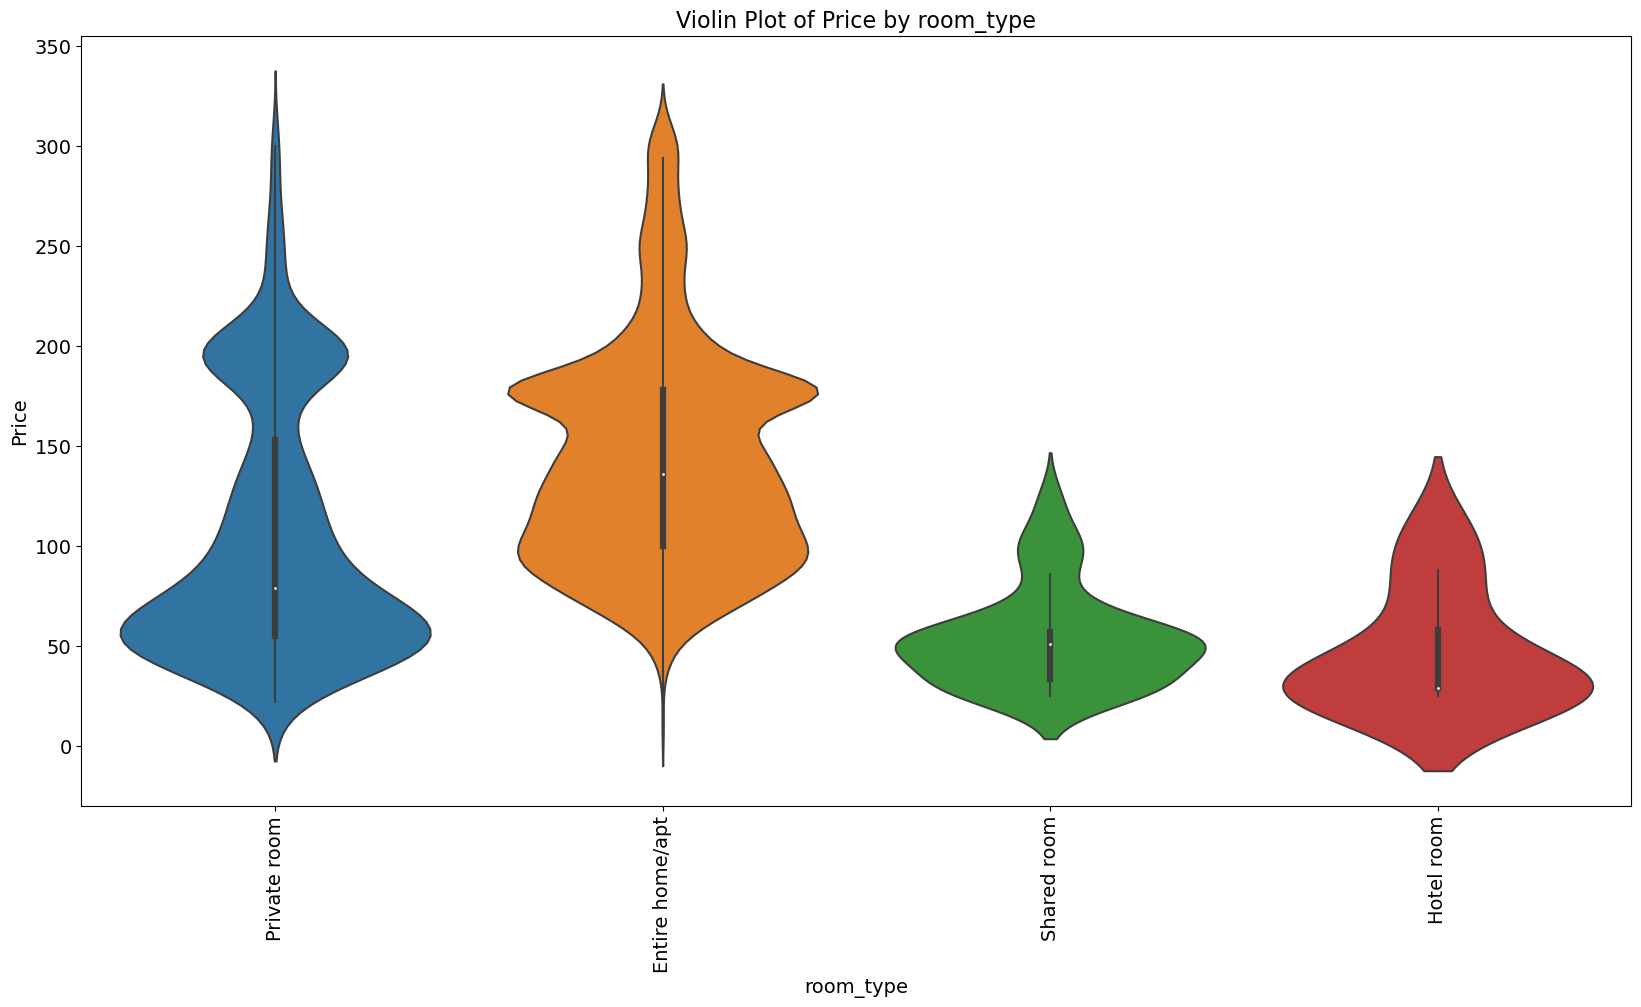

In [22]:
plt.figure(figsize = (20, 10))
sns.violinplot(x = 'room_type', y = 'price',  data = airbnb_df ,scale='width')
xt = plt.xticks(rotation=90)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('room_type', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Violin Plot of Price by room_type', fontsize=16)
plt.show()

bar graph illustrating the distribution of different property types listed on Airbnb. The most common type of listing is entire homes/apartments

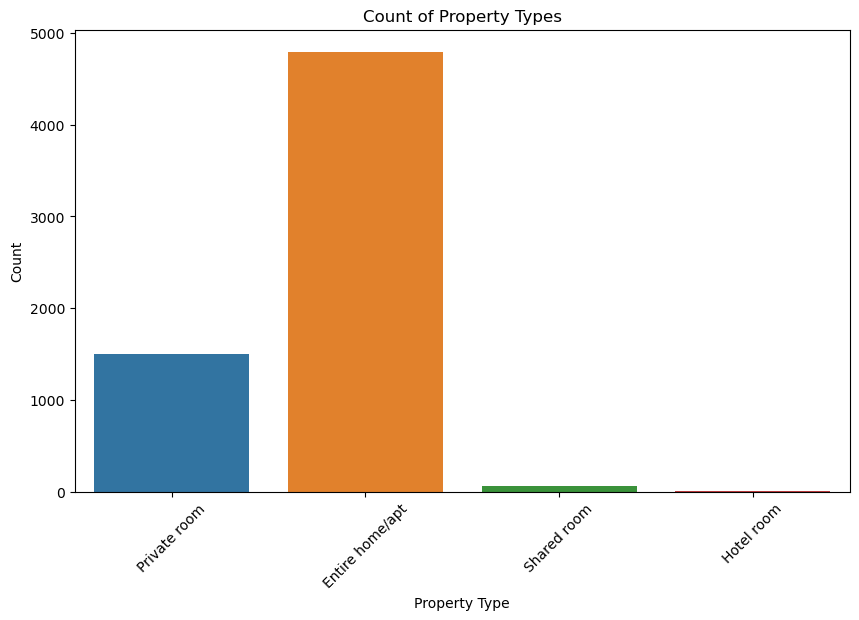

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(data=airbnb_df, x='room_type')
plt.title('Count of Property Types')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

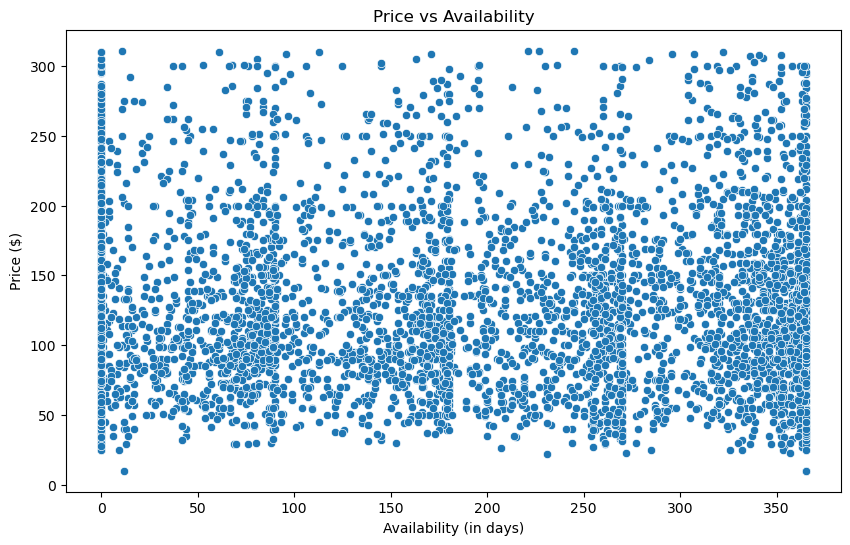

In [24]:
# The plot appears dense, indicating a wide range of prices and availability durations.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=airbnb_df, x='availability_365', y='price')
plt.title('Price vs Availability')
plt.xlabel('Availability (in days)')
plt.ylabel('Price ($)')
plt.show()

The correlation matrix graph provides valuable insights into the relationships between various factors

C:\Users\abdul\AppData\Local\Temp\ipykernel_288\501912687.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(airbnb_df.corr(), annot =True, vmin = -1, vmax=1 ,cmap='RdBu')


<Axes: >

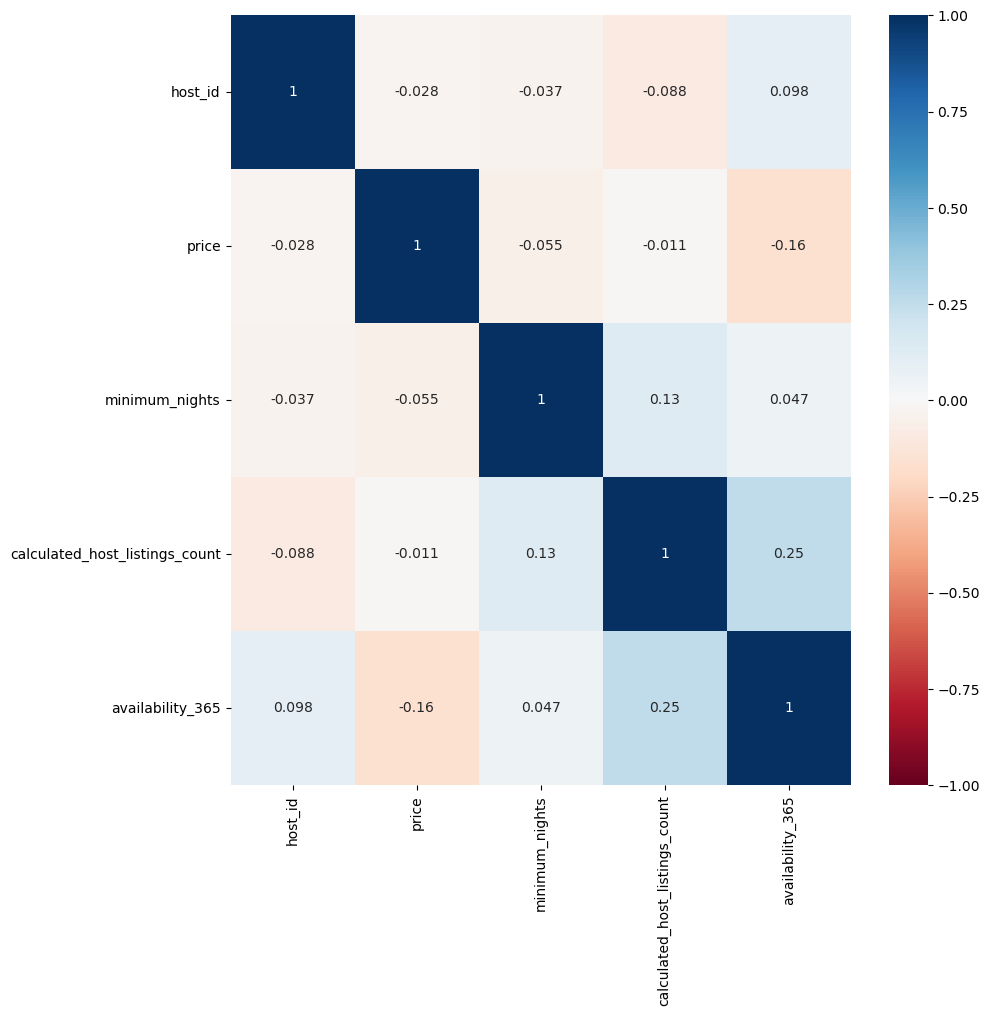

In [25]:
plt.figure(figsize = (10,10))
sns.heatmap(airbnb_df.corr(), annot =True, vmin = -1, vmax=1 ,cmap='RdBu')

The histogram plot provides valuable insights:

1.The most prominent peak occurs around the $100 mark. This suggests that a significant number of listings fall within this price range.

2.While the majority of listings cluster around $100, there is a long tail extending beyond $200.

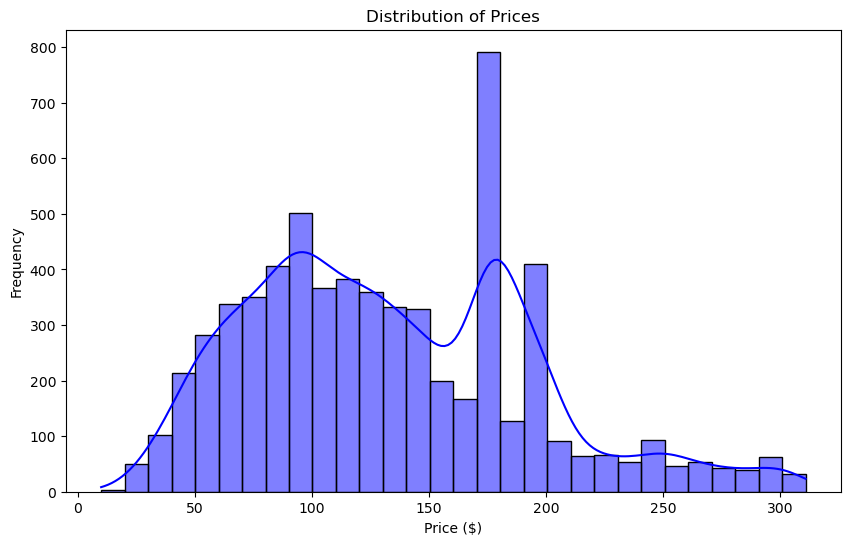

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(airbnb_df['price'], bins=30, kde=True, color='blue')
plt.title('Distribution of Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()


The pairplot offers a visual exploration of relationships between key variables in our Airbnb data. 

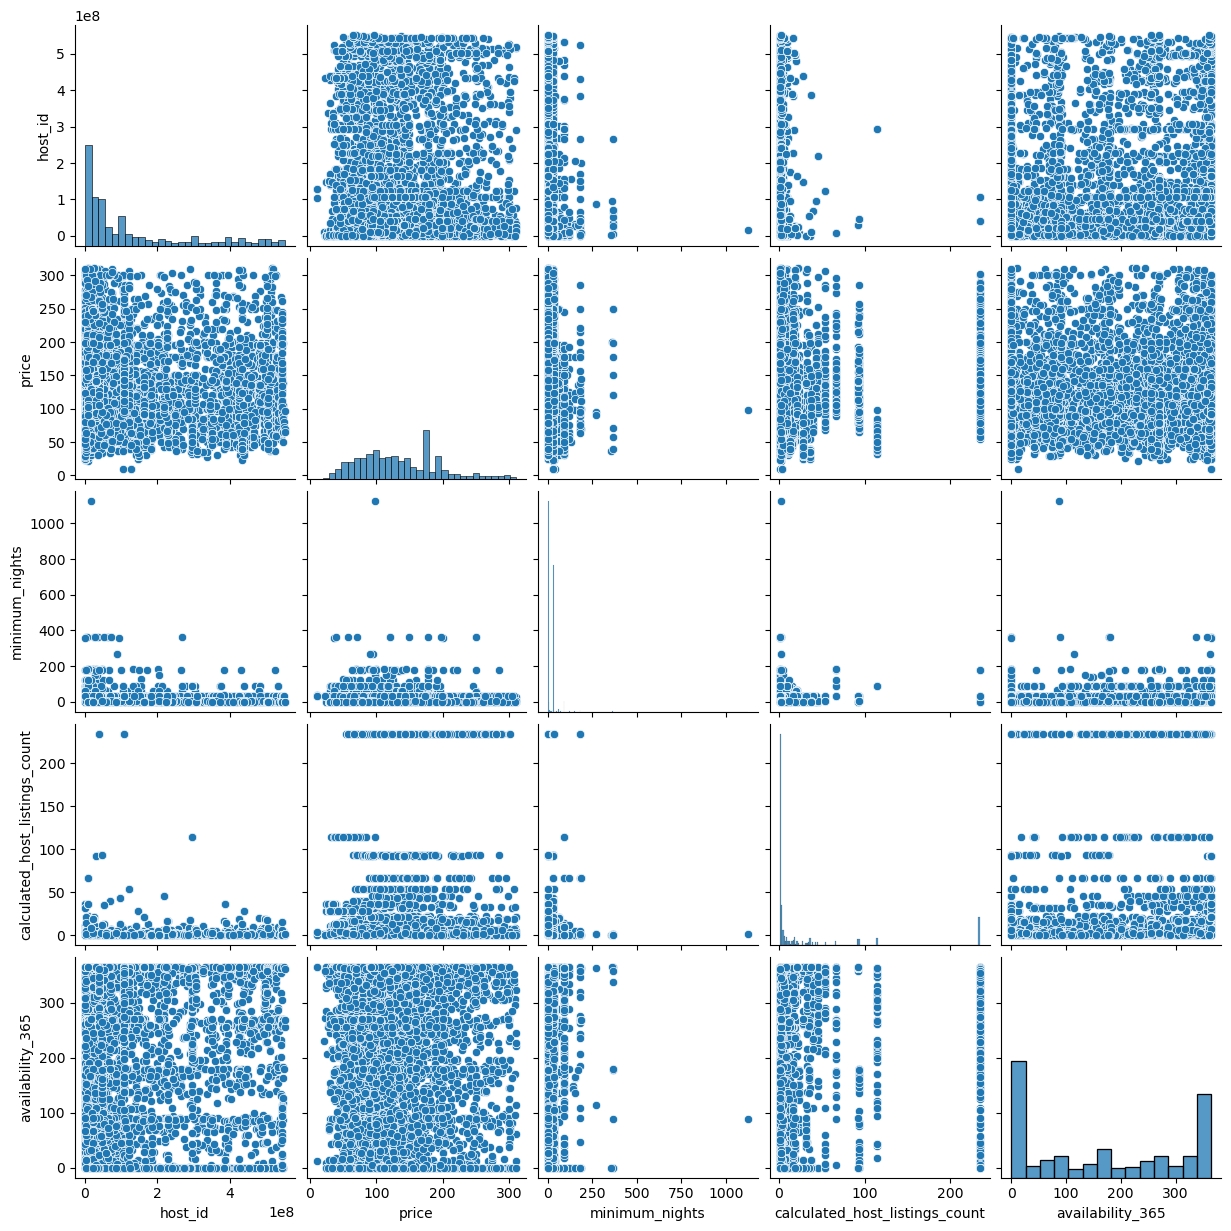

In [27]:

sns.pairplot(airbnb_df)
plt.show()

In [28]:
#availability_365 - price
result = airbnb_df.groupby(["availability_365"])['price'].describe()
result

,count,mean,std,min,25%,50%,75%,max
availability_365,,,,,,,,
0,1710.0,154.989139,52.355378,25.0,114.00,177.883035,177.883035,310.0
1,10.0,124.900000,35.479102,77.0,100.25,121.500000,146.250000,180.0
2,5.0,114.400000,59.125291,45.0,65.00,125.000000,149.000000,188.0
3,7.0,108.000000,36.601457,60.0,82.00,111.000000,131.500000,158.0
4,11.0,156.545455,62.015101,75.0,101.00,175.000000,199.500000,246.0
...,...,...,...,...,...,...,...,...
361,38.0,123.289474,50.260891,35.0,86.00,131.000000,153.750000,240.0
362,75.0,99.853333,54.370275,36.0,60.50,82.000000,122.500000,300.0
363,97.0,133.175258,53.407633,27.0,100.00,128.000000,159.000000,296.0


In [29]:
#neighbourhood - price
esult = airbnb_df.groupby(["neighbourhood"])['price'].describe()
result

,count,mean,std,min,25%,50%,75%,max
availability_365,,,,,,,,
0,1710.0,154.989139,52.355378,25.0,114.00,177.883035,177.883035,310.0
1,10.0,124.900000,35.479102,77.0,100.25,121.500000,146.250000,180.0
2,5.0,114.400000,59.125291,45.0,65.00,125.000000,149.000000,188.0
3,7.0,108.000000,36.601457,60.0,82.00,111.000000,131.500000,158.0
4,11.0,156.545455,62.015101,75.0,101.00,175.000000,199.500000,246.0
...,...,...,...,...,...,...,...,...
361,38.0,123.289474,50.260891,35.0,86.00,131.000000,153.750000,240.0
362,75.0,99.853333,54.370275,36.0,60.50,82.000000,122.500000,300.0
363,97.0,133.175258,53.407633,27.0,100.00,128.000000,159.000000,296.0


Average price of entire homes or apartments on Airbnb is the most expensive, at around $140. This is followed by private rooms, which cost around $120 per night on average. hotel rooms are the cheapest option, averaging around $60 per night.

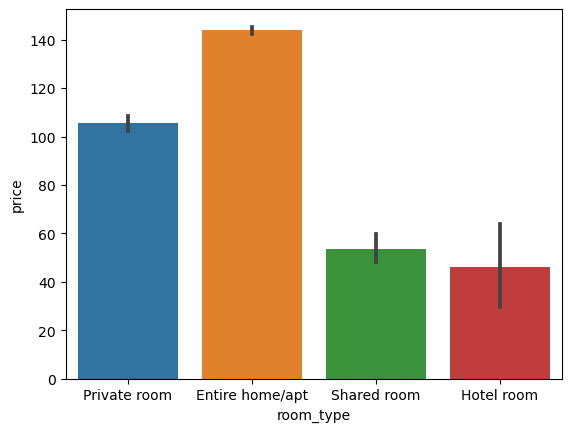

In [30]:
#room_type - price
sns.barplot(x='room_type', y="price", data=airbnb_df)
plt.show()


Average price of a room in different neighborhoods.

In [31]:
resutl = airbnb_df.groupby(['neighbourhood','room_type', 'availability_365'])['price'].mean().reset_index()
resutl.sort_values(by='price', ascending=False).head(10)
     

,neighbourhood,room_type,availability_365,price
3027,"West End, Foggy Bottom, GWU",Entire home/apt,227,311.0
3025,"West End, Foggy Bottom, GWU",Entire home/apt,221,311.0
1892,"Ivy City, Arboretum, Trinidad, Carver Langston",Entire home/apt,113,310.0
670,"Columbia Heights, Mt. Pleasant, Pleasant Plain...",Entire home/apt,61,310.0
774,"Columbia Heights, Mt. Pleasant, Pleasant Plain...",Entire home/apt,307,309.0
1649,"Georgetown, Burleith/Hillandale",Entire home/apt,296,309.0
1763,"Howard University, Le Droit Park, Cardozo/Shaw",Entire home/apt,96,309.0
1687,"Georgetown, Burleith/Hillandale",Private room,341,308.0
1436,"Edgewood, Bloomingdale, Truxton Circle, Eckington",Entire home/apt,336,307.0
562,"Cathedral Heights, McLean Gardens, Glover Park",Entire home/apt,343,306.0


 Are there any differences in price by location?

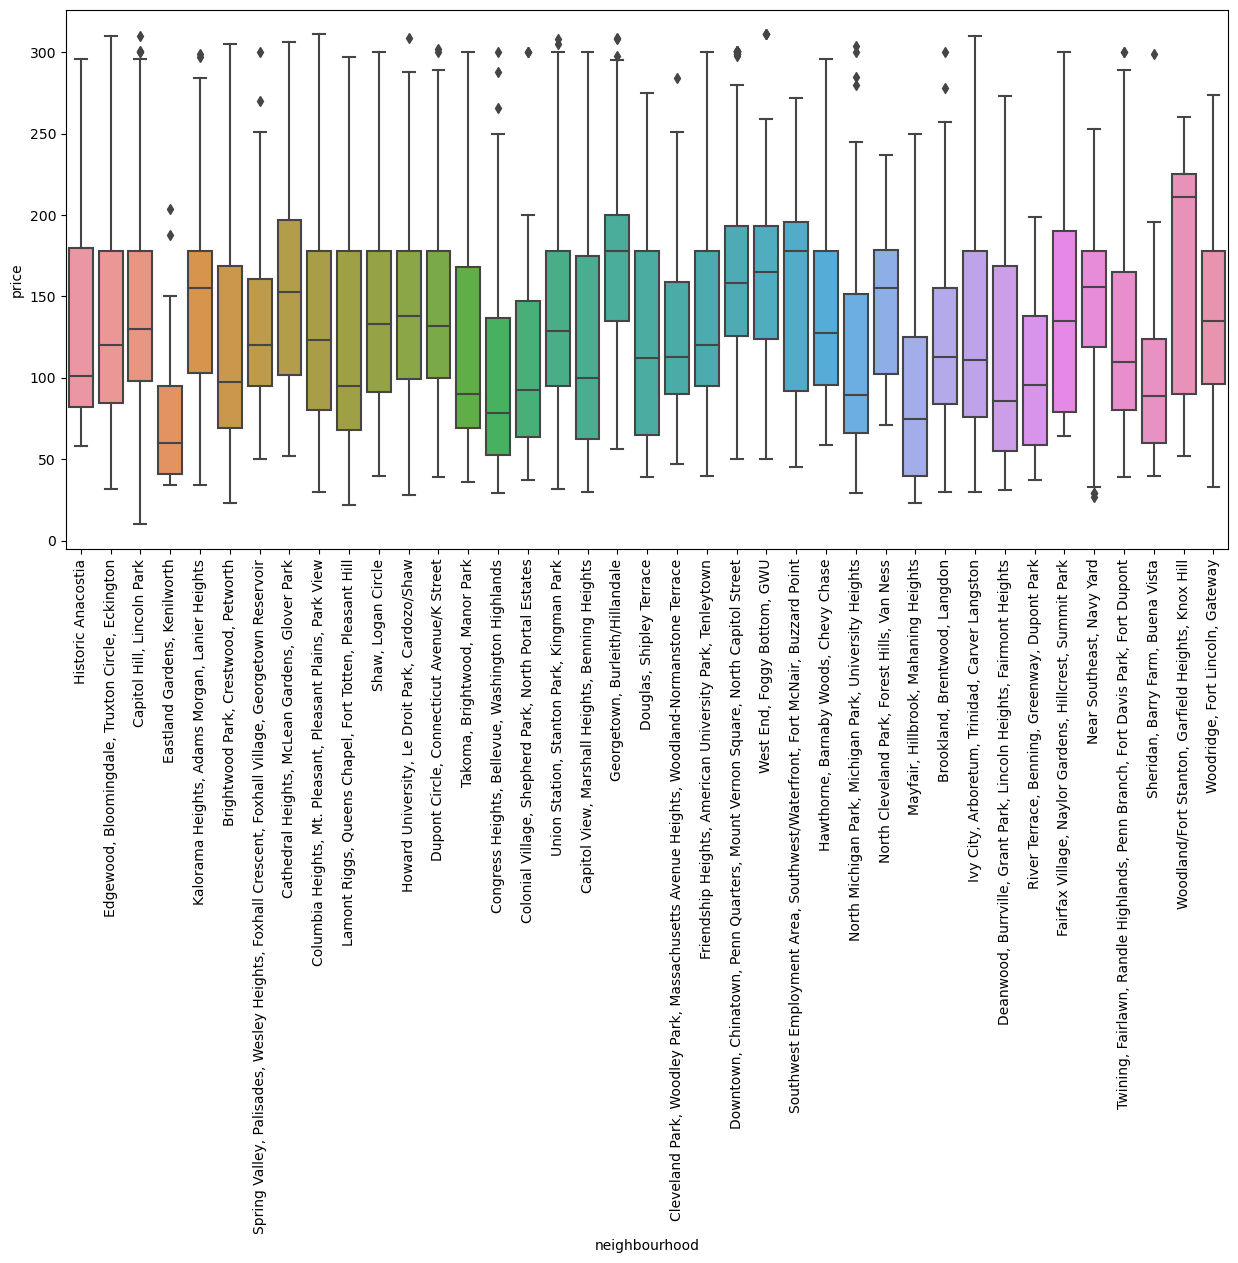

In [32]:
plt.figure(figsize = (15, 7))
sns.boxplot(x = "neighbourhood", y = "price", data=airbnb_df)
xt = plt.xticks(rotation=90)
plt.show()




1. The analysis reveals interesting connections between listing features:


--Calculated Host Listings Count and Availability: There is a moderate positive correlation between the number of listings a host manages (calculated host listings count) and the availability of those listings throughout the year. Experienced hosts with more listings tend to have higher availability.


--Price and Availability: there is a slight negative correlation between price and availability. Listings with higher prices may also have less availability, possibly due to strategic pricing strategies.
Hosts might employ strategic pricing. Listings in high demand or with unique features might be priced higher, leading to less availability as they get booked up faster.Moreover, Popular destinations or specific room types might experience seasonal fluctuations in both price and availability. During peak seasons, prices could rise due to increased demand, leading to lower availability as bookings fill up.


--Availability and Minimum Nights:Listings with longer minimum nights tend to have higher availability throughout the year.
Therefore we should,optimize booking policies to balance guest preferences and occupancy.


2. Potential Pricing Adjustments:

--Consider evaluating listings in the $150-$200 range. Are they attracting enough bookings? If not, we might explore adjusting prices or enhancing their features.


-Compare our distribution with competitors’ pricing. Are we competitive in the $100 range?

Overall, the data suggests that Airbnb offers a variety of accommodation options at different price points. This could be helpful for travelers who are looking for a budget-friendly option or those who are looking for a more spacious and private place to stay.



3. Revenue Optimization Strategies

Explore Dynamic Pricing Strategies:
--Implement data-driven adjustments to pricing based on factors like seasonality, local events, and competitor pricing to optimize revenue without alienating customers.


Highlight Value Propositions:
--For all room types, emphasize unique selling points like local experiences, amenities, or a sense of community to justify the price point.




